In [1]:
# Import libraries

from pathlib import Path
import numpy as np
import pandas as pd   
import seaborn as sns 
import matplotlib  
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline           

In [4]:
# read in the data from multiple files

pathx = Path(r"C:\Users\newla\Downloads\Data")
files = pathx.glob("*.*")  

alldf = pd.concat(map(lambda x: pd.read_csv(x, encoding = "latin-1"), files), ignore_index=True)

In [5]:
# write the merged data into a csv file

alldf.to_csv(pathx/ "all_data.csv", index=False)
df = pd.read_csv(pathx/ "all_data.csv")
df.head()

,House ID,Category,Sale Date,Company,Address,Quantity,budget,gross
0,CA-2016-152156,Residential,11/08/2016,Stanley Kubrick,"United States,Kentucky,Henderson",2.0,19000000.0,46998772.0
1,CA-2016-152156,Raw Land,11/08/2016,Randal Kleiser,"United States,Kentucky,Henderson",3.0,4500000.0,58853106.0
2,CA-2016-138688,Commercial,06/12/2016,Irvin Kershner,"United States,California,Los Angeles",2.0,18000000.0,538375067.0
3,US-2015-108966,Special Use,10/11/2015,Jim Abrahams,"United States,Florida,Fort Lauderdale",5.0,3500000.0,83453539.0
4,US-2015-108966,Special Use,10/11/2015,Harold Ramis,"United States,Florida,Fort Lauderdale",2.0,6000000.0,39846344.0


# <span style="color:red"> Clean the Data </span>

In [6]:
# Check if there is any missing value in the data

df.isnull().any()

House ID     True
Category     True
Sale Date    True
Company      True
Address      True
Quantity     True
budget       True
gross        True
dtype: bool

In [7]:
#Check the number of missing values at each column

df.isnull().sum()

House ID     3160
Category     3160
Sale Date    3160
Company      3160
Address       834
Quantity      834
budget       5331
gross        3349
dtype: int64

In [6]:
#Check the number of missing values in each ROW
# for i in range(len(df.index)) :
#     print("Row", i ,"=", df.iloc[i].isnull().sum())


In [8]:
# see the sum of the missing values at the entire dataframe
df.isnull().sum().sum()

22988

In [9]:
# drop null values
df = df.dropna()

In [10]:
df.isnull().sum().sum()

0

In [11]:
# Check Data types of columns

df.dtypes

House ID      object
Category      object
Sale Date     object
Company       object
Address       object
Quantity     float64
budget       float64
gross        float64
dtype: object

In [12]:
# change the data type of Quantity column

df ["Quantity"] = df ["Quantity"].astype("int64")

In [13]:
# change the data type of Sale Date column to datetime

df ["Sale Date"] = df ["Sale Date"].astype("datetime64")


In [14]:
# Detect and drop duplicates

df.duplicated(subset=["House ID", "Company"])
df = df.drop_duplicates(subset=["House ID", "Company"])

In [15]:
# Split Address columns into three columns, Country - State - City

df["Country"]= df["Address"].apply(lambda x: x.split(",")[0])
df["State"]= df["Address"].apply(lambda x: x.split(",")[1])
df["City"]= df["Address"].apply(lambda x: x.split(",")[2])

# # or do as follows

# new_date = df["Address"].str.split(",", n = -1, expand = True)

# df["Country"]= new_date [0]
# df["State"] = new_date [1]
# df["City"]= new_date [2]

df.head()

,House ID,Category,Sale Date,Company,Address,Quantity,budget,gross,Country,State,City
0,CA-2016-152156,Residential,2016-11-08,Stanley Kubrick,"United States,Kentucky,Henderson",2,19000000.0,46998772.0,United States,Kentucky,Henderson
1,CA-2016-152156,Raw Land,2016-11-08,Randal Kleiser,"United States,Kentucky,Henderson",3,4500000.0,58853106.0,United States,Kentucky,Henderson
2,CA-2016-138688,Commercial,2016-06-12,Irvin Kershner,"United States,California,Los Angeles",2,18000000.0,538375067.0,United States,California,Los Angeles
3,US-2015-108966,Special Use,2015-10-11,Jim Abrahams,"United States,Florida,Fort Lauderdale",5,3500000.0,83453539.0,United States,Florida,Fort Lauderdale
4,US-2015-108966,Special Use,2015-10-11,Harold Ramis,"United States,Florida,Fort Lauderdale",2,6000000.0,39846344.0,United States,Florida,Fort Lauderdale


In [ ]:
# Fix invalid values

In [17]:
# sort the data  

df = df.sort_values("Sale Date", ascending=False)

In [18]:
# Display all the data
# pd.set_option("display.max_rows", None)

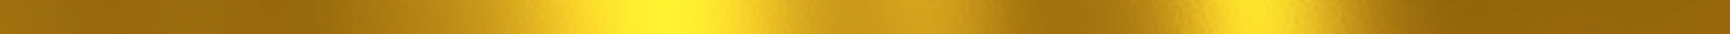

# <span style="color:cornflowerblue">Analyse the Data</span>

#### <span style="color:chocolate">Which variables(columns) are correlated with the gross</span>

Text(0, 0.5, 'Gross Earnings')

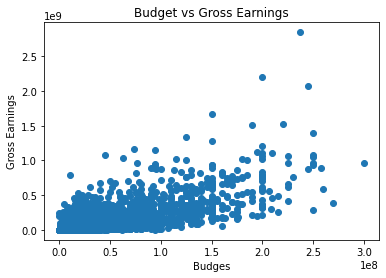

In [35]:
# Scater plot with budget vs  gross

plt.scatter(x=df["budget"], y=df["gross"])

plt.title("Budget vs Gross Earnings")
plt.xlabel("Budges")
plt.ylabel("Gross Earnings")


<AxesSubplot:xlabel='budget', ylabel='gross'>

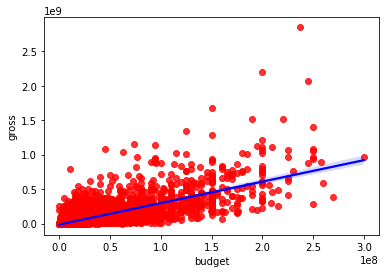

In [41]:
# plot budget vs gross using seaborn

sns.regplot(x=df["budget"], y=df["gross"], data=df, scatter_kws={"color":"red"}, line_kws = {"color":"blue"})


In [49]:
# Look at the correlation 
df.corr()
# df.corr(method="kendall")
# df.corr(method="spearman")

,Quantity,budget,gross
Quantity,1.000000,-0.005532,0.009857
budget,-0.005532,1.000000,0.719193
gross,0.009857,0.719193,1.000000


Text(33.0, 0.5, 'Data future')

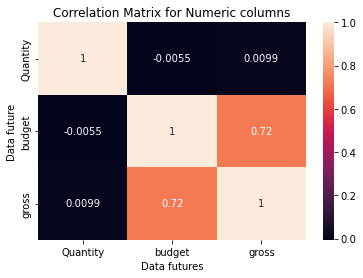

In [58]:
#Visualize the correlation matrix

correlation_matrix = df.corr() 
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Matrix for Numeric columns")
plt.xlabel("Data features")
plt.ylabel("Data features")

Text(0, 0.5, 'Gross Earnings')

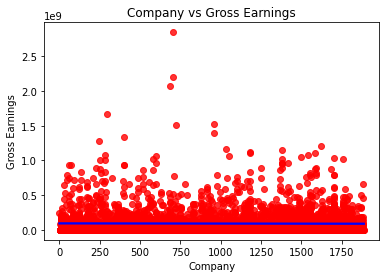

In [63]:
# plot company vs  gross using seaborn

# first generate numeric representation of company column, give companies a code

df_coded_company = df 
df_coded_company["Company"]= df_coded_company["Company"].astype("category")
df_coded_company["Company"]= df_coded_company["Company"].cat.codes
df_coded_company

# plot 

sns.regplot(x=df_coded_company["Company"], y=df_coded_company["gross"], data=df_coded_company, scatter_kws={"color":"red"}, line_kws = {"color":"blue"})

plt.title("Company vs Gross Earnings")
plt.xlabel("Company")
plt.ylabel("Gross Earnings")


In [66]:
# Generate numeric representation of all non numeric columns 

df_coded = df 
for col_name in df_coded.columns:
    if df_coded[col_name].dtype=="object":
        df_coded[col_name]= df_coded_company[col_name].astype("category")
        df_coded[col_name]= df_coded_company[col_name].cat.codes
df_coded

,House ID,Category,Sale Date,Company,Address,Quantity,budget,gross,Country,State,City
1297,1675,0,2017-12-30,1644,40,2,3500000.0,4385516.0,0,3,115
1296,1675,0,2017-12-30,986,40,2,3000000.0,13030057.0,0,3,115
645,1806,3,2017-12-30,1533,186,2,19000000.0,381906762.0,0,12,76
906,1993,6,2017-12-30,847,315,4,1100000.0,5450815.0,0,30,261
907,1993,0,2017-12-30,707,315,7,6500000.0,2347000.0,0,30,261
...,...,...,...,...,...,...,...,...,...,...,...
593,239,6,2014-01-09,1855,433,3,18000000.0,19265302.0,0,41,190
8487,208,0,2014-01-06,484,41,3,150000000.0,603900354.0,0,3,127
739,87,4,2014-01-04,905,172,3,12000000.0,17130087.0,0,11,253
740,87,6,2014-01-04,1564,172,3,3000000.0,7196872.0,0,11,253


In [67]:
# Look at the correlation 
df_coded.corr()


,House ID,Category,Company,Address,Quantity,budget,gross,Country,State,City
House ID,1.000000,-0.006832,-0.014217,0.042637,-0.003697,0.012808,0.009637,NaN,0.041541,-0.016321
Category,-0.006832,1.000000,-0.012600,0.003145,0.009167,-0.280296,-0.201642,NaN,0.002098,-0.003776
Company,-0.014217,-0.012600,1.000000,0.011816,-0.009700,0.001366,-0.009000,NaN,0.015190,-0.020415
Address,0.042637,0.003145,0.011816,1.000000,-0.008609,-0.004552,-0.009769,NaN,0.994053,0.021639
Quantity,-0.003697,0.009167,-0.009700,-0.008609,1.000000,-0.005532,0.009857,NaN,-0.008789,-0.012303
budget,0.012808,-0.280296,0.001366,-0.004552,-0.005532,1.000000,0.719193,NaN,-0.003406,0.008090
gross,0.009637,-0.201642,-0.009000,-0.009769,0.009857,0.719193,1.000000,NaN,-0.008220,0.025231
Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,0.041541,0.002098,0.015190,0.994053,-0.008789,-0.003406,-0.008220,NaN,1.000000,0.000077
City,-0.016321,-0.003776,-0.020415,0.021639,-0.012303,0.008090,0.025231,NaN,0.000077,1.000000


Text(69.0, 0.5, 'Data features')

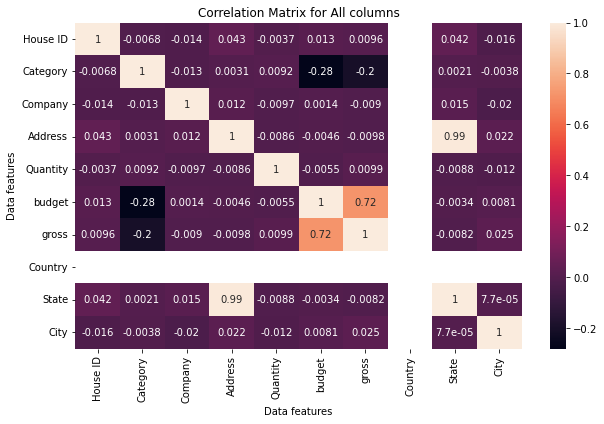

In [71]:
#visualize the correlation matrix

correlation_matrix = df_coded.corr() 

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for All columns")
plt.xlabel("Data features")
plt.ylabel("Data features")


In [76]:
# Unstack the correlation matrix

correlation_matrix = df_coded.corr() 
correlation_pairs  = correlation_matrix.unstack()
correlation_pairs 

House ID  House ID    1.000000
          Category   -0.006832
          Company    -0.014217
          Address     0.042637
          Quantity   -0.003697
                        ...   
City      budget      0.008090
          gross       0.025231
          Country          NaN
          State       0.000077
          City        1.000000
Length: 100, dtype: float64

In [77]:
# sort the correlation pair

sorted_correlation = correlation_pairs.sort_values()
sorted_correlation


budget    Category   -0.280296
Category  budget     -0.280296
          gross      -0.201642
gross     Category   -0.201642
Company   City       -0.020415
                        ...   
Country   Country          NaN
          State            NaN
          City             NaN
State     Country          NaN
City      Country          NaN
Length: 100, dtype: float64

In [79]:
# filter the high correlation

high_correlation = sorted_correlation[(sorted_correlation) > 0.5]
high_correlation

gross     budget      0.719193
budget    gross       0.719193
Address   State       0.994053
State     Address     0.994053
House ID  House ID    1.000000
Quantity  Quantity    1.000000
gross     gross       1.000000
budget    budget      1.000000
Address   Address     1.000000
Company   Company     1.000000
Category  Category    1.000000
State     State       1.000000
City      City        1.000000
dtype: float64

In [ ]:
# budget has high correlation to gross earnings 